# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [40]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
# Your code here - Manipulate column names
subs = [('+', 'plus'), ('-', '_'), ('™', ''), ('®', ''), (' ', '_'), ('½', 'half'), ('.', ''), ("'", "")]
for old, new in subs:
    df.columns = [col.replace(old,new) for col in df.columns]

In [42]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14',
       'ages_10_16', 'ages_10_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [43]:
# Your code here - Define the target and predictors
predictors = df.columns.drop('list_price')
predictors = '+'.join(predictors)
target = 'list_price'

In [44]:
predictors

'piece_count+num_reviews+play_star_rating+star_rating+val_star_rating+ages_10plus+ages_10_14+ages_10_16+ages_10_21+ages_11_16+ages_12plus+ages_12_16+ages_14plus+ages_16plus+ages_1half_3+ages_1half_5+ages_2_5+ages_4plus+ages_4_7+ages_4_99+ages_5plus+ages_5_12+ages_5_8+ages_6plus+ages_6_12+ages_6_14+ages_7plus+ages_7_12+ages_7_14+ages_8plus+ages_8_12+ages_8_14+ages_9plus+ages_9_12+ages_9_14+ages_9_16+theme_name_Angry_Birds+theme_name_Architecture+theme_name_BOOST+theme_name_Blues_Helicopter_Pursuit+theme_name_BrickHeadz+theme_name_Carnotaurus_Gyrosphere_Escape+theme_name_City+theme_name_Classic+theme_name_Creator_3_in_1+theme_name_Creator_Expert+theme_name_DC_Comics_Super_Heroes+theme_name_DC_Super_Hero_Girls+theme_name_DIMENSIONS+theme_name_DUPLO+theme_name_Dilophosaurus_Outpost_Attack+theme_name_Disney+theme_name_Elves+theme_name_Friends+theme_name_Ghostbusters+theme_name_Ideas+theme_name_Indoraptor_Rampage_at_Lockwood_Estate+theme_name_Juniors+theme_name_Jurassic_Park_Velociraptor_Cha

In [45]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [46]:
# Your code here - Fit the actual model
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     551.9
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:35:54   Log-Likelihood:                -40419.
No. Observations:                8152   AIC:                         8.103e+04
Df Residuals:                    8057   BIC:                         8.169e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6638      1.720     37.022      0.000      60.293      67.035
piece_count                                         75.7007      0.874     86.566      0.000      73.986      77.415
num_reviews                                          6.7467      0.673     10.018      0.000       5.427       8.067
play_star_rating                                     5.0680      0.618      8.197      0.000       3.856       6.280
star_rating                                         -1.4792      0.709     -2.086      0.037      -2.869      -0.089
val_star_rating                                     -8.1586      0.623    -13.087      0.000      -9.381      -6.937
ages_10plus                                        114.7970      6.668     17.215      0.000     101.725     127.869
ages_10_14                                         -22.4079      8.800     -2.546      0.011     -39.658      -5.158
ages_10_16                                         -10.1051      4.024     -2.512      0.012     -17.992      -2.218
ages_10_21                                          66.2214      7.319      9.048      0.000      51.875      80.568
ages_11_16                                         -12.6087      5.826     -2.164      0.030     -24.029      -1.189
ages_12plus                                         68.0093      5.412     12.567      0.000      57.401      78.618
ages_12_16                                         -64.2670      6.804     -9.446      0.000     -77.604     -50.930
ages_14plus                                         25.5332      4.144      6.161      0.000      17.409      33.657
ages_16plus                                         38.1163      5.999      6.353      0.000      26.356      49.876
ages_1half_3                                        -9.1237      2.373     -3.844      0.000     -13.776      -4.471
ages_1half_5                                        -4.1068      3.043     -1.350      0.177     -10.071       1.858
ages_2_5                                            14.5427      1.676      8.678      0.000      11.258      17.828
ages_4plus                                         -19.6155      5.682     -3.452      0.001     -30.753      -8.478
ages_4_7                                            -6.8962      3.380     -2.040      0.041     -13.522      -0.271
ages_4_99                                           -2.7577      3.324     -0.830      0.407      -9.273       3.758
ages_5plus                                          -9.4854      3.179     -2.984      0.003     -15.717      -3.254
ages_5_12                                          -36.6766      3.099    -11.836      0.000     -42.751     -30.602
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [47]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
p_table.head()

103 76
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14', 'ages_10_16', 'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16', 'ages_14plus', 'ages_16plus', 'ages_1half_3', 'ages_2_5', 'ages_4plus', 'ages_4_7', 'ages_5plus', 'ages_5_12', 'ages_6plus', 'ages_6_12', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12', 'ages_9_14', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_Expert', 'theme_name_DC_Comics_Super_Heroes', 'theme_name_DIMENSIONS', 'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney', 'theme_name_Ghostbusters', 'theme_name_Ideas', 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate', 'theme_name_MINDSTORMS', 'theme_name_Marvel_Super_Heroes', 'theme_name_Minecraft', 'theme_name_Minifigures', 'them

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.6638,1.720,37.022,0.000,60.293,67.035
piece_count,75.7007,0.874,86.566,0.000,73.986,77.415
num_reviews,6.7467,0.673,10.018,0.000,5.427,8.067
play_star_rating,5.0680,0.618,8.197,0.000,3.856,6.280
star_rating,-1.4792,0.709,-2.086,0.037,-2.869,-0.089


In [48]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     691.8
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:35:55   Log-Likelihood:                -40426.
No. Observations:                8152   AIC:                         8.100e+04
Df Residuals:                    8076   BIC:                         8.154e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.8542      2.710     23.559      0.000      58.541      69.167
piece_count                                         75.7048      0.862     87.873      0.000      74.016      77.394
num_reviews                                          6.8339      0.667     10.239      0.000       5.526       8.142
play_star_rating                                     5.1939      0.606      8.574      0.000       4.006       6.381
star_rating                                         -1.3923      0.696     -2.000      0.046      -2.757      -0.028
val_star_rating                                     -8.2347      0.599    -13.746      0.000      -9.409      -7.060
ages_10plus                                        119.8485      7.632     15.704      0.000     104.889     134.808
ages_10_14                                         -18.2334      9.293     -1.962      0.050     -36.450      -0.017
ages_10_16                                          -7.0862      4.213     -1.682      0.093     -15.344       1.172
ages_10_21                                          71.5919      8.074      8.867      0.000      55.764      87.420
ages_11_16                                         -10.0064      5.939     -1.685      0.092     -21.649       1.636
ages_12plus                                         72.5989      6.471     11.219      0.000      59.914      85.284
ages_12_16                                         -60.9773      7.323     -8.327      0.000     -75.332     -46.622
ages_14plus                                         29.7265      5.020      5.922      0.000      19.887      39.567
ages_16plus                                         41.6618      6.898      6.040      0.000      28.141      55.183
ages_1half_3                                        -4.4909      3.584     -1.253      0.210     -11.515       2.534
ages_2_5                                            19.0602      2.660      7.167      0.000      13.847      24.274
ages_4plus                                         -17.0991      8.786     -1.946      0.052     -34.322       0.124
ages_4_7                                            -3.2953      2.782     -1.184      0.236      -8.750       2.159
ages_5plus                                          -7.8147      3.325     -2.350      0.019     -14.332      -1.297
ages_5_12                                          -31.5093      3.144    -10.023      0.000     -37.672     -25.347
ages_6plus                                         -22.6261      5.854     -3.865      0.000     -34.101     -11.151
ages_6_12                                          -17.9118      2.516     -7.120      0.000     -22.843     -12.980
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [49]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
p_table.head()

77 59
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_21', 'ages_12plus', 'ages_12_16', 'ages_14plus', 'ages_16plus', 'ages_2_5', 'ages_5plus', 'ages_5_12', 'ages_6plus', 'ages_6_12', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12', 'ages_9_14', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_Expert', 'theme_name_DC_Comics_Super_Heroes', 'theme_name_DIMENSIONS', 'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney', 'theme_name_Ghostbusters', 'theme_name_Ideas', 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate', 'theme_name_MINDSTORMS', 'theme_name_Marvel_Super_Heroes', 'theme_name_Minecraft', 'theme_name_Minifigures', 'theme_name_NINJAGO', 'theme_name_SERIOUS_PLAY', 'theme_name_Star_Wars', 'theme_name_T_rex

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.8542,2.710,23.559,0.000,58.541,69.167
piece_count,75.7048,0.862,87.873,0.000,74.016,77.394
num_reviews,6.8339,0.667,10.239,0.000,5.526,8.142
play_star_rating,5.1939,0.606,8.574,0.000,4.006,6.381
star_rating,-1.3923,0.696,-2.000,0.046,-2.757,-0.028


In [50]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     892.8
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:35:56   Log-Likelihood:                -40441.
No. Observations:                8152   AIC:                         8.100e+04
Df Residuals:                    8093   BIC:                         8.141e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.5494      1.214     52.327      0.000      61.169      65.930
piece_count                                         75.4170      0.796     94.724      0.000      73.856      76.978
num_reviews                                          6.1847      0.609     10.150      0.000       4.990       7.379
play_star_rating                                     5.3717      0.596      9.017      0.000       4.204       6.539
star_rating                                         -1.4111      0.688     -2.051      0.040      -2.760      -0.062
val_star_rating                                     -8.3582      0.593    -14.094      0.000      -9.521      -7.196
ages_10plus                                        123.9357      7.417     16.709      0.000     109.396     138.476
ages_10_21                                          74.8358      7.935      9.431      0.000      59.282      90.390
ages_12plus                                         78.0126      6.139     12.708      0.000      65.979      90.046
ages_12_16                                         -53.2265      6.820     -7.805      0.000     -66.595     -39.858
ages_14plus                                         39.2038      4.105      9.551      0.000      31.158      47.250
ages_16plus                                         50.6229      6.160      8.218      0.000      38.548      62.698
ages_2_5                                            22.1343      1.826     12.118      0.000      18.554      25.715
ages_5plus                                          -7.1098      3.119     -2.279      0.023     -13.225      -0.995
ages_5_12                                          -27.9843      2.553    -10.960      0.000     -32.989     -22.979
ages_6plus                                         -18.9972      5.544     -3.427      0.001     -29.865      -8.129
ages_6_12                                          -13.8090      1.650     -8.367      0.000     -17.044     -10.574
ages_7_12                                          -13.0998      2.011     -6.513      0.000     -17.042      -9.157
ages_7_14                                           -8.5990      1.739     -4.946      0.000     -12.007      -5.191
ages_8plus                                          23.9067      4.859      4.920      0.000      14.382      33.431
ages_8_12                                          -12.5677      2.518     -4.992      0.000     -17.503      -7.633
ages_8_14                                           -7.4300      1.826     -4.069      0.000     -11.009      -3.851
ages_9plus                                         107.4521     11.093      9.686      0.000      85.707     129.197
ages_9_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [51]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\katma\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.123208236884064),
 ('num_reviews', 2.525769126897833),
 ('play_star_rating', 2.4021930150379824),
 ('star_rating', 3.1565494747972984),
 ('val_star_rating', 2.403180233341885),
 ('ages_10plus', 17.662502184787563),
 ('ages_10_21', 7.157673744910495),
 ('ages_12plus', 6.982258464792272),
 ('ages_12_16', 1.1338924943426776),
 ('ages_14plus', 1.7617723113898347),
 ('ages_16plus', 8.619022706006627),
 ('ages_2_5', 1.1794925640575067),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1644788516721247),
 ('ages_6plus', 2.6603245367792505),
 ('ages_6_12', 1.7993307075099052),
 ('ages_7_12', 1.4492557095056648),
 ('ages_7_14', 1.7249124281991182),
 ('ages_8plus', 3.3280003999566152),
 ('ages_8_12', 1.2461656534588537),
 ('ages_8_14', 1.754798428110072),
 ('ages_9plus', 1.5513140512637202),
 ('ages_9_12', 1.0181720194784922),
 ('ages_9_14', 1.7374118181649003),
 ('theme_name_Architecture', 5.864437666531333),
 ('theme_name_BOOST', 1.0629897185535013),
 ('theme_name_Blues_Helicopter_Pur

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [52]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(f'Columns removed: {len(vif_scores) - len(x_cols)}')

Columns removed: 9


In [53]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     932.1
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:35:59   Log-Likelihood:                -40813.
No. Observations:                8152   AIC:                         8.173e+04
Df Residuals:                    8101   BIC:                         8.208e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           69.8534      1.040     67.196      0.000      67.816      71.891
piece_count                                         78.1090      0.654    119.371      0.000      76.826      79.392
num_reviews                                          5.2651      0.596      8.830      0.000       4.096       6.434
play_star_rating                                     7.2832      0.541     13.466      0.000       6.223       8.343
star_rating                                         -2.5505      0.693     -3.680      0.000      -3.909      -1.192
val_star_rating                                     -9.2249      0.614    -15.030      0.000     -10.428      -8.022
ages_12_16                                         -68.9896      6.808    -10.134      0.000     -82.335     -55.644
ages_14plus                                         16.3491      3.721      4.393      0.000       9.054      23.644
ages_2_5                                            17.0629      1.779      9.591      0.000      13.575      20.550
ages_5_12                                          -34.4077      2.594    -13.266      0.000     -39.492     -29.323
ages_6plus                                         -26.0533      5.753     -4.528      0.000     -37.332     -14.775
ages_6_12                                          -21.3741      1.596    -13.396      0.000     -24.502     -18.246
ages_7_12                                          -20.1782      2.006    -10.061      0.000     -24.110     -16.247
ages_7_14                                          -15.5871      1.701     -9.163      0.000     -18.922     -12.253
ages_8plus                                           0.4403      4.326      0.102      0.919      -8.040       8.921
ages_8_12                                          -19.2057      2.505     -7.667      0.000     -24.116     -14.295
ages_8_14                                          -15.5588      1.777     -8.757      0.000     -19.041     -12.076
ages_9plus                                          20.1201     10.418      1.931      0.053      -0.301      40.541
ages_9_12                                          -29.8590      6.236     -4.788      0.000     -42.084     -17.634
ages_9_14                                          -12.9753      2.457     -5.280      0.000     -17.792      -8.158
theme_name_BOOST                                    85.2600      9.101      9.368      0.000      67.420     103.100
theme_name_Blues_Helicopter_Pursuit                 22.3829      9.251      2.420      0.016       4.249      40.517
theme_name_Carnotaurus_Gyrosphere_Escape            50.8442      9.574      5.311      0.000      32.077      69.612
theme_name_City                          

In [54]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 2.6070783240655593),
 ('num_reviews', 2.2172978141139503),
 ('play_star_rating', 1.757664955979977),
 ('star_rating', 2.870430613827164),
 ('val_star_rating', 2.3390312649518763),
 ('ages_12_16', 1.072355661503203),
 ('ages_14plus', 1.3778848956949377),
 ('ages_2_5', 1.1296846996123044),
 ('ages_5_12', 3.1240523303279226),
 ('ages_6plus', 2.654100067053144),
 ('ages_6_12', 1.7504587830189315),
 ('ages_7_12', 1.4333439201666056),
 ('ages_7_14', 1.6849830393508887),
 ('ages_8plus', 2.482110764461427),
 ('ages_8_12', 1.2196635229645172),
 ('ages_8_14', 1.693511104351891),
 ('ages_9plus', 1.2441956444700686),
 ('ages_9_12', 1.0168167608110914),
 ('ages_9_14', 1.6249540334280794),
 ('theme_name_BOOST', 1.0596735198041405),
 ('theme_name_Blues_Helicopter_Pursuit', 1.0405032901283087),
 ('theme_name_Carnotaurus_Gyrosphere_Escape', 1.0476075203782385),
 ('theme_name_City', 3.046166548858408),
 ('theme_name_Classic', 1.0386671120399371),
 ('theme_name_Creator_Expert', 1.7784257

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

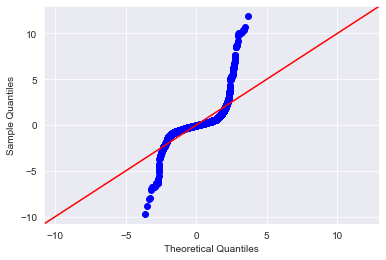

In [55]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

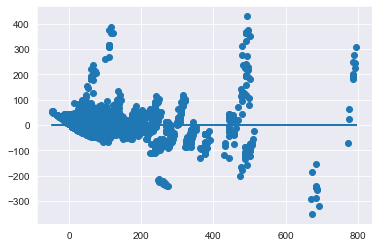

In [56]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [57]:
# Your code here - Check for outliers
for i in range(80,100):
    q = i/100
    print(f'{q} percentile: {df.list_price.quantile(q=q)}')

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [58]:
# Your code here
# Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 450]
print(f'Percent removed: {(orig_tot - len(df))/orig_tot}')

# Rerun the model
train, test = train_test_split(df)
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1137.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:36:08   Log-Likelihood:                -36989.
No. Observations:                8067   AIC:                         7.408e+04
Df Residuals:                    8016   BIC:                         7.444e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.1054      0.693     92.530      0.000      62.747      65.463
piece_count                                         65.5892      0.516    127.204      0.000      64.578      66.600
num_reviews                                          1.6137      0.412      3.915      0.000       0.806       2.422
play_star_rating                                     6.4808      0.358     18.089      0.000       5.779       7.183
star_rating                                         -2.4087      0.461     -5.225      0.000      -3.312      -1.505
val_star_rating                                     -7.1147      0.407    -17.486      0.000      -7.912      -6.317
ages_12_16                                         -18.3215      4.812     -3.808      0.000     -27.754      -8.889
ages_14plus                                         31.5931      2.561     12.336      0.000      26.573      36.613
ages_2_5                                            15.4378      1.163     13.272      0.000      13.158      17.718
ages_5_12                                          -37.3357      1.704    -21.914      0.000     -40.675     -33.996
ages_6plus                                         -31.8823      3.611     -8.830      0.000     -38.960     -24.805
ages_6_12                                          -18.9616      1.057    -17.943      0.000     -21.033     -16.890
ages_7_12                                          -16.5539      1.308    -12.652      0.000     -19.119     -13.989
ages_7_14                                          -14.7633      1.119    -13.193      0.000     -16.957     -12.570
ages_8plus                                          -1.7478      2.904     -0.602      0.547      -7.440       3.944
ages_8_12                                          -12.5656      1.687     -7.450      0.000     -15.872      -9.259
ages_8_14                                           -7.6512      1.153     -6.637      0.000      -9.911      -5.391
ages_9plus                                           9.2575      6.819      1.358      0.175      -4.109      22.624
ages_9_12                                          -19.2888      4.278     -4.508      0.000     -27.676     -10.902
ages_9_14                                            2.8326      1.627      1.742      0.082      -0.356       6.021
theme_name_BOOST                                    98.4219      5.980     16.459      0.000      86.700     110.144
theme_name_Blues_Helicopter_Pursuit                 22.7934      5.896      3.866      0.000      11.236      34.351
theme_name_Carnotaurus_Gyrosphere_Escape            50.8541      6.493      7.832      0.000      38.126      63.582
theme_name_City                          

In [59]:
df.list_price = df.list_price.map(np.log)
train, test = train_test_split(df)
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     475.2
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:36:09   Log-Likelihood:                -5057.0
No. Observations:                8067   AIC:                         1.022e+04
Df Residuals:                    8016   BIC:                         1.057e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4716      0.013    264.651      0.000       3.446       3.497
piece_count                                          0.6270      0.010     64.145      0.000       0.608       0.646
num_reviews                                         -0.0144      0.008     -1.804      0.071      -0.030       0.001
play_star_rating                                     0.1343      0.007     19.603      0.000       0.121       0.148
star_rating                                         -0.0600      0.009     -6.826      0.000      -0.077      -0.043
val_star_rating                                     -0.1335      0.008    -16.869      0.000      -0.149      -0.118
ages_12_16                                          -0.0828      0.088     -0.945      0.344      -0.255       0.089
ages_14plus                                          0.4009      0.049      8.197      0.000       0.305       0.497
ages_2_5                                             0.4363      0.022     19.866      0.000       0.393       0.479
ages_5_12                                           -0.7610      0.033    -23.201      0.000      -0.825      -0.697
ages_6plus                                          -0.9179      0.074    -12.436      0.000      -1.063      -0.773
ages_6_12                                           -0.1949      0.020     -9.728      0.000      -0.234      -0.156
ages_7_12                                            0.0466      0.025      1.842      0.066      -0.003       0.096
ages_7_14                                           -0.0301      0.021     -1.432      0.152      -0.071       0.011
ages_8plus                                           0.5590      0.057      9.844      0.000       0.448       0.670
ages_8_12                                            0.2088      0.032      6.532      0.000       0.146       0.272
ages_8_14                                            0.3013      0.022     13.632      0.000       0.258       0.345
ages_9plus                                           0.1200      0.130      0.921      0.357      -0.135       0.376
ages_9_12                                            0.2867      0.084      3.406      0.001       0.122       0.452
ages_9_14                                            0.4402      0.031     13.982      0.000       0.378       0.502
theme_name_BOOST                                     0.9419      0.121      7.775      0.000       0.704       1.179
theme_name_Blues_Helicopter_Pursuit                  0.6998      0.120      5.848      0.000       0.465       0.934
theme_name_Carnotaurus_Gyrosphere_Escape             1.0956      0.113      9.689      0.000       0.874       1.317
theme_name_City                          

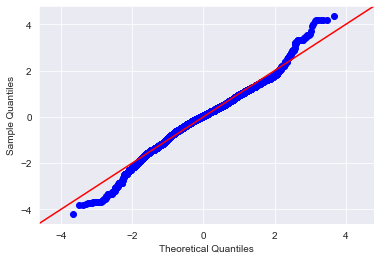

In [60]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

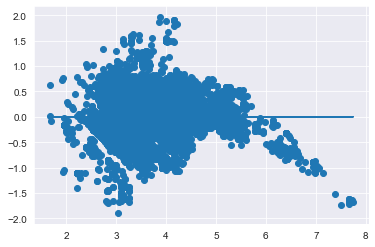

In [61]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 Percentile: 4.447203233446613
0.81 Percentile: 4.512971560274537
0.82 Percentile: 4.542526402035123
0.83 Percentile: 4.580752485605895
0.84 Percentile: 4.640913706863106
0.85 Percentile: 4.6985494117910225
0.86 Percentile: 4.718373863481943
0.87 Percentile: 4.787408405976297
0.88 Percentile: 4.8039210397329235
0.89 Percentile: 4.826327766567244
0.9 Percentile: 4.89924031131419
0.91 Percentile: 4.976713742220571
0.92 Percentile: 5.0490223265009595
0.93 Percentile: 5.140421850231899
0.94 Percentile: 5.209419483952433
0.95 Percentile: 5.292263579298989
0.96 Percentile: 5.391752152536553
0.97 Percentile: 5.528952783620542
0.98 Percentile: 5.678340376637527
0.99 Percentile: 5.873347331375852


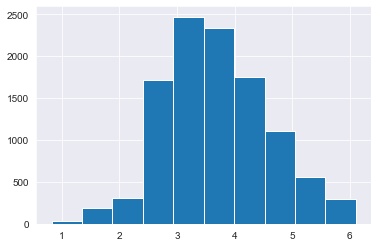

In [62]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print(f'{q} Percentile: {df.list_price.quantile(q)}')
    
df.list_price.hist()

In [63]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     463.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:36:14   Log-Likelihood:                -4937.7
No. Observations:                8027   AIC:                             9977.
Df Residuals:                    7976   BIC:                         1.033e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4737      0.013    261.144      0.000       3.448       3.500
piece_count                                          0.6812      0.011     62.872      0.000       0.660       0.702
num_reviews                                         -0.0136      0.008     -1.730      0.084      -0.029       0.002
play_star_rating                                     0.1261      0.007     18.634      0.000       0.113       0.139
star_rating                                         -0.0609      0.009     -7.108      0.000      -0.078      -0.044
val_star_rating                                     -0.1158      0.008    -15.279      0.000      -0.131      -0.101
ages_12_16                                          -0.3235      0.085     -3.791      0.000      -0.491      -0.156
ages_14plus                                          0.2861      0.049      5.807      0.000       0.189       0.383
ages_2_5                                             0.4665      0.022     21.168      0.000       0.423       0.510
ages_5_12                                           -0.7529      0.032    -23.395      0.000      -0.816      -0.690
ages_6plus                                          -0.9461      0.070    -13.449      0.000      -1.084      -0.808
ages_6_12                                           -0.1842      0.020     -9.324      0.000      -0.223      -0.145
ages_7_12                                            0.0376      0.025      1.507      0.132      -0.011       0.087
ages_7_14                                           -0.0117      0.021     -0.556      0.578      -0.053       0.029
ages_8plus                                           0.5816      0.053     10.881      0.000       0.477       0.686
ages_8_12                                            0.2123      0.032      6.733      0.000       0.151       0.274
ages_8_14                                            0.3117      0.022     14.047      0.000       0.268       0.355
ages_9plus                                           0.1764      0.129      1.365      0.172      -0.077       0.430
ages_9_12                                            0.3090      0.080      3.881      0.000       0.153       0.465
ages_9_14                                            0.4142      0.031     13.199      0.000       0.353       0.476
theme_name_BOOST                                     0.9571      0.139      6.900      0.000       0.685       1.229
theme_name_Blues_Helicopter_Pursuit                  0.6828      0.111      6.133      0.000       0.465       0.901
theme_name_Carnotaurus_Gyrosphere_Escape             1.1090      0.115      9.643      0.000       0.884       1.334
theme_name_City                          

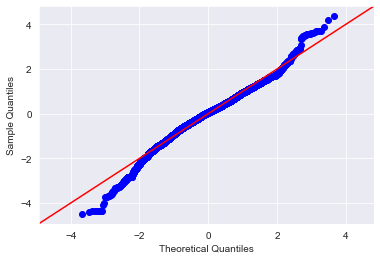

In [64]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

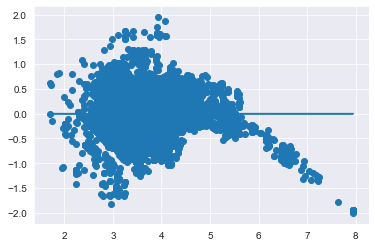

In [65]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 